---
<h1 align='center' style="color:green">CO2 Emmision prediction</h1>

---

# 1. Import the libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_profiling

---
# 2. load the data

In [4]:
data=pd.read_csv("data/FuelConsumption.csv")
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


### Apply descriptive statitics

In [5]:
data.tail()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260
1066,2014,VOLVO,XC90 AWD,SUV - STANDARD,3.2,6,AS6,X,14.9,10.2,12.8,22,294


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
MODELYEAR                   1067 non-null int64
MAKE                        1067 non-null object
MODEL                       1067 non-null object
VEHICLECLASS                1067 non-null object
ENGINESIZE                  1067 non-null float64
CYLINDERS                   1067 non-null int64
TRANSMISSION                1067 non-null object
FUELTYPE                    1067 non-null object
FUELCONSUMPTION_CITY        1067 non-null float64
FUELCONSUMPTION_HWY         1067 non-null float64
FUELCONSUMPTION_COMB        1067 non-null float64
FUELCONSUMPTION_COMB_MPG    1067 non-null int64
CO2EMISSIONS                1067 non-null int64
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
MODELYEAR,1067.0,2014.000000,0.000000,2014.0,2014.00,2014.0,2014.00,2014.0
ENGINESIZE,1067.0,3.346298,1.415895,1.0,2.00,3.4,4.30,8.4
CYLINDERS,1067.0,5.794752,1.797447,3.0,4.00,6.0,8.00,12.0
FUELCONSUMPTION_CITY,1067.0,13.296532,4.101253,4.6,10.25,12.6,15.55,30.2
FUELCONSUMPTION_HWY,1067.0,9.474602,2.794510,4.9,7.50,8.8,10.85,20.5
FUELCONSUMPTION_COMB,1067.0,11.580881,3.485595,4.7,9.00,10.9,13.35,25.8
FUELCONSUMPTION_COMB_MPG,1067.0,26.441425,7.468702,11.0,21.00,26.0,31.00,60.0
CO2EMISSIONS,1067.0,256.228679,63.372304,108.0,207.00,251.0,294.00,488.0


In [8]:
# check nul value in any column
data.isna().sum()  # no null value in any column

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [10]:
### Make profile report
data.profile_report()

---
## 3. Data Visualization
### pair plot of data
#### basically, the pair plot is used to show the numeric distribution in the scatter plot

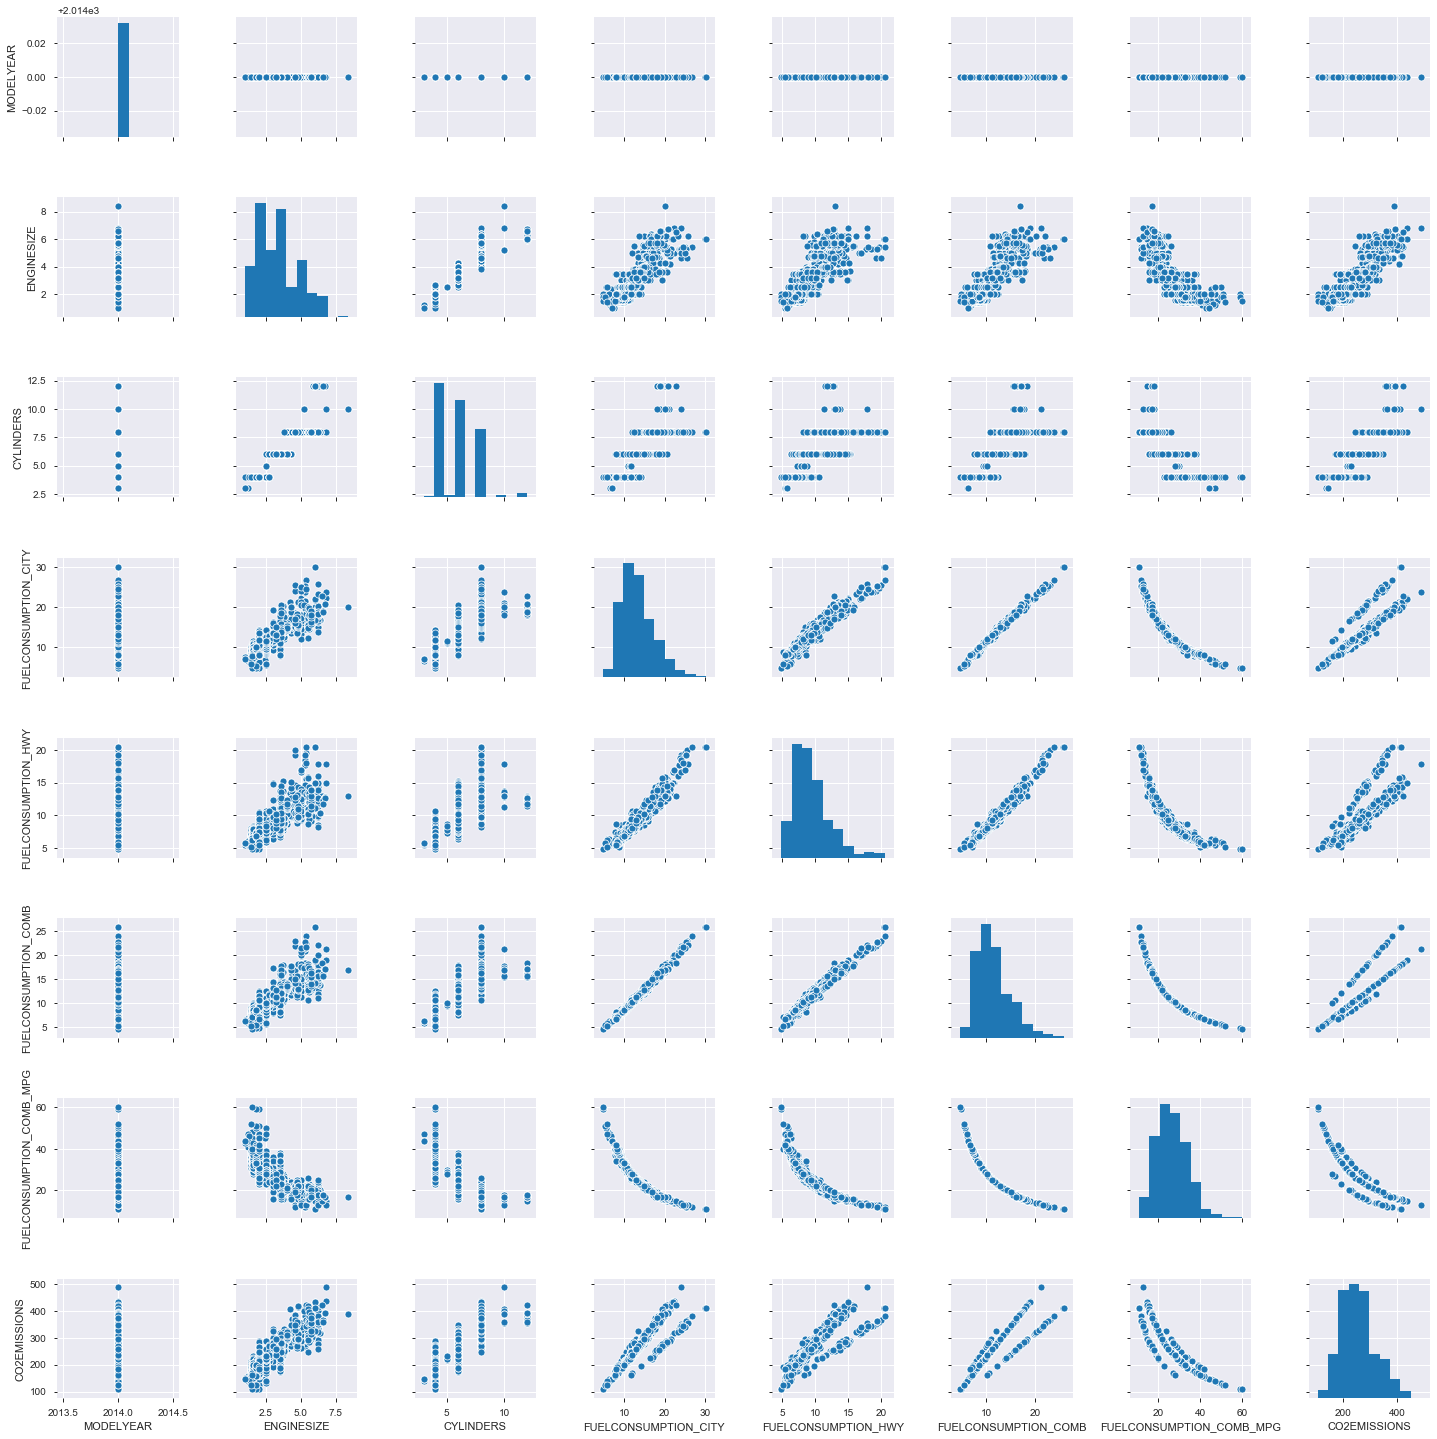

In [24]:
sns.pairplot(data)

####  We can see from pair plot that "ENGINESIZE","CYLINDERS","FUELCONSUMPTION_CITY","FUELCONSUMPTION_HWY","FUELCONSUMPTION_COMB" are linearly coreelated with "CO2EMISSIONS"

## Heatmap of a correlation matrix
#### To find a correlation between each feature and target we visualize heatmap using the correlation matrix

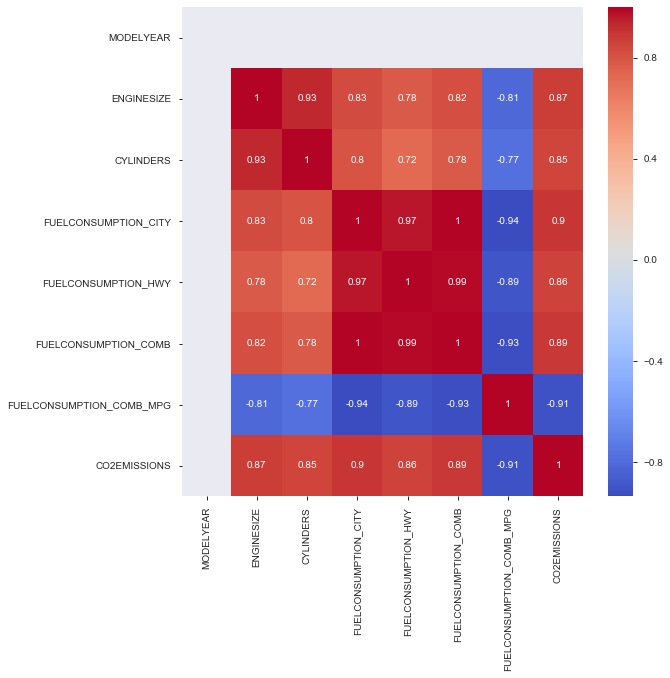

In [20]:
plt.figure(figsize=(9,9))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')

# 1. single Linear Regression
### Take "ENGINESIZE" as single feature

In [27]:
# Select features
X=data[["ENGINESIZE"]].values
X

array([[2. ],
       [2.4],
       [1.5],
       ...,
       [3. ],
       [3.2],
       [3.2]])

### Normalize the data

In [28]:
from sklearn.preprocessing import StandardScaler
X=StandardScaler().fit(X).transform(X.astype(float))
X

array([[-0.9512918 ],
       [-0.66865251],
       [-1.30459092],
       ...,
       [-0.24469358],
       [-0.10337393],
       [-0.10337393]])

In [55]:
# Select the target
y=data["CO2EMISSIONS"].values
y

array([196, 221, 136, ..., 271, 260, 294], dtype=int64)

---
## Split the data

### We split the data into 70% train data and 30% Test data

In [129]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((746, 1), (321, 1), (746,), (321,))

In [130]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
# fit the data
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)

In [131]:
## Actual data
y_test[0:20]

array([274, 200, 196, 161, 320, 224, 192, 189, 221, 182, 230, 283, 189,
       400, 186, 168, 196, 338, 271, 225], dtype=int64)

In [132]:
## Predicted data
y_pred[0:20]

array([243.34753384, 180.59365156, 204.12635741, 204.12635741,
       306.10141612, 243.34753384, 204.12635741, 196.28212213,
       243.34753384, 219.81482799, 219.81482799, 243.34753384,
       219.81482799, 329.63412198, 223.73694563, 223.73694563,
       188.43788684, 298.25718084, 262.95812205, 219.81482799])

### Model score

In [133]:
# for train data
reg.score(X_train,y_train)

0.7623157653247916

In [134]:
# for test dataset
reg.score(X_test,y_test)

0.7672977379444553

In [135]:
## Accuracy score
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7672977379444553

### We got approximate same score for Train & Test data
### Our model is good with 76.72% accuracy score

---
### Find the error

In [136]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,classification_report

In [140]:
df1=pd.DataFrame({"Features":"ENGINESIZE",
                  "Actual data":y_test[0:5],
                  "Predicted data":y_pred[0:5],
                  "MSE":mean_squared_error(y_test,y_pred),
                  "MAE":mean_absolute_error(y_test,y_pred)
                 })
df1

,Features,Actual data,Predicted data,MSE,MAE
0,ENGINESIZE,274,243.347534,989.072703,23.531863
1,ENGINESIZE,200,180.593652,989.072703,23.531863
2,ENGINESIZE,196,204.126357,989.072703,23.531863
3,ENGINESIZE,161,204.126357,989.072703,23.531863
4,ENGINESIZE,320,306.101416,989.072703,23.531863


---
# 2. Multi Linear regression

####  Select  "ENGINESIZE" , "CYLINDERS" , "FUELCONSUMPTION_CITY" , "FUELCONSUMPTION_HWY" , "FUELCONSUMPTION_COMB" as a FEATURE bcoz thet r highly correlated with "CO2EMISSIONS" 

In [149]:
X=data[['ENGINESIZE', 'CYLINDERS','FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB']].values
X

array([[ 2. ,  4. ,  9.9,  6.7,  8.5],
       [ 2.4,  4. , 11.2,  7.7,  9.6],
       [ 1.5,  4. ,  6. ,  5.8,  5.9],
       ...,
       [ 3. ,  6. , 13.4,  9.8, 11.8],
       [ 3.2,  6. , 12.9,  9.3, 11.3],
       [ 3.2,  6. , 14.9, 10.2, 12.8]])

#### Normalize the data

In [150]:
from sklearn.preprocessing import StandardScaler
X=StandardScaler().fit(X).transform(X.astype(float))
X

array([[-0.9512918 , -0.99896853, -0.82855772, -0.99334135, -0.88430407],
       [-0.66865251, -0.99896853, -0.5114328 , -0.63532912, -0.5685715 ],
       [-1.30459092, -0.99896853, -1.77993246, -1.31555236, -1.63058106],
       ...,
       [-0.24469358,  0.11424235,  0.02524013,  0.11649658,  0.06289365],
       [-0.10337393,  0.11424235, -0.09673099, -0.06250954, -0.08062116],
       [-0.10337393,  0.11424235,  0.3911535 ,  0.25970147,  0.34992326]])

In [151]:
## Select target
y=data["CO2EMISSIONS"].values
y

array([196, 221, 136, ..., 271, 260, 294], dtype=int64)

---
## Split the data

In [152]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((746, 5), (321, 5), (746,), (321,))

In [153]:
from sklearn.linear_model import LinearRegression
reg1=LinearRegression()
reg1.fit(X_train,y_train)
y_pred=reg1.predict(X_test)

#### Check the score

In [154]:
# train data
reg1.score(X_train,y_train)

0.8625128728907367

In [155]:
# Test data
reg1.score(X_test,y_test)

0.8672303423683431

In [156]:
# Accuracy score
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8672303423683431

### Find the Error

In [157]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,classification_report

In [160]:
df1=pd.DataFrame({"Features":['ENGINESIZE', 'CYLINDERS','FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB'],
                  "Actual data":y_test[0:5],
                  "Predicted data":y_pred[0:5],
                  "MSE":mean_squared_error(y_test,y_pred),
                  "MAE":mean_absolute_error(y_test,y_pred)
                 })
df1

,Features,Actual data,Predicted data,MSE,MAE
0,ENGINESIZE,274,256.723052,564.321305,17.013271
1,CYLINDERS,200,194.119827,564.321305,17.013271
2,FUELCONSUMPTION_CITY,196,199.161485,564.321305,17.013271
3,FUELCONSUMPTION_HWY,161,184.964489,564.321305,17.013271
4,FUELCONSUMPTION_COMB,320,306.956239,564.321305,17.013271


### *classification_report not supported for Continuous data*